In [ ]:
#@title { display-mode: "form" }

# import packages
import os
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import pandas as pd
from scipy import stats
import matploblib.pyplot as plt

import IPython
import ipywidgets as widgets

from IPython.display import Image
from IPython.core.display import Image, display
from random import randint
from torchvision.utils import save_image
 
from torch.utils.data import DataLoader
import torchvision.utils as vutils

from PIL import Image
from PIL import ImageFilter

!pip install --quiet ipywidgets

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [ ]:
#@title  { display-mode: "form" }
html_code = \
title_html = """
<h1>Facial Classification Bias Detection Engine</h1>

<h3>This bias detection engine allows for the detection of bias in facial classification and text classification models</h3>

<style>
p {
    margin-bottom: 1.2em;
    line-height: 1.5;
}
</style>

<p>Complete the form below to set up the correct parameters and run our engine over your model.</p>

<p>Check out our GitHub Here: <a href="https://github.com/ajfrai/Pytorch-BiasDetection"> here</a>. </p>
"""

display(IPython.display.HTML(html_code))

In [ ]:
#@title 
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 7),
            nn.ReLU(),
            nn.Conv2d(64, 128, 7)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, 3, stride=2, padding=1, output_padding=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
        
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [ ]:
# load models
aa_model = torch.load('s3://pytorch-hackathon-bias-detection/AAFaceAEModel-Conv.pth', map_location=device)
white_model = torch.load('s3://pytorch-hackathon-bias-detection/WhiteFaceAEModel-Conv.pth', map_location=device)

## Define and instantiate the model
Please fill in your model class below

In [ ]:
class classifier(nn.Module):
    
    #define all the layers used in model
    def __init__():
        
        #Constructor
        super().__init__()          
        
     
    def forward():
        
        return outputs

In [ ]:
def instantiate_model():
  
  #hyperparameters go here

  #instantiate the model
  model = classifier()
  return model

In [ ]:
model = instantiate_model()
print(model)

In [ ]:
# load model weights
weights = torch.load('', map_location=device)
model.load_state_dict(weights)

##Define prediction function

In [ ]:
def predict(model, input, classes):

    # do not feel restricted by the structure of this function
    # define any prediction function you would like
    # the only restriction is that the output must be one of the classes
    prediction = None

    if prediction < .5:
      return classes[0]
    else:
      return classes[1] 

In [ ]:
#@title Define your desired data paramaters

class Sharpen(object):
    """Sharpen the image in a sample."""

    def __call__(self, sample):
        # Apply sharp filter
        sharpened1 = sample.filter(ImageFilter.SHARPEN);
        sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);

        return sample
# get arbitrary test data (to be inputted by the user)

# constants

# Root directory for dataset
dataroot = "s3://pytorch-hackathon-bias-detection/s3_test_data"
# Number of workers for dataloader
workers = 2 #@param {type:"integer"}
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64 #@param {type:"integer"}
# Batch size during training
batch_size = 16 #@param {type:"integer"}


# We can use an image folder dataset the way we have it setup.
# Create the dataset
transformer = transforms.Compose([
                               Sharpen(),
                               transforms.Resize(image_size), 
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ])
testset = torchvision.datasets.ImageFolder(root=dataroot,
                           transform=transformer)

# Create the dataloader
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

## Define your output classes in ascending social impact order
For example, if we are writing a hiring algorithm, the object would be

<code>
["Reject","Interview","Hire"] 
</code>

Rejection in general is worse than an interview, which in turn is worse than being hired outright.

In [ ]:
social_impact_order_classes = []

Button(button_style='info', description='Get Sample', icon='check', style=ButtonStyle(), tooltip='Get Sample')

Original:


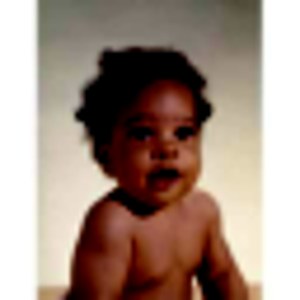

AA Picture:


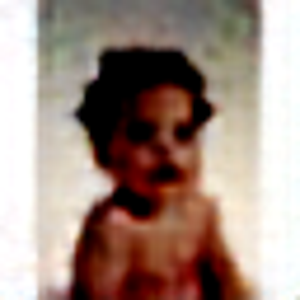

White Picture:


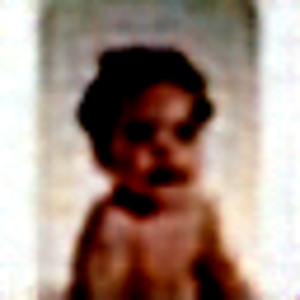

In [ ]:
#@title See an example test pair
import random

def get_sample(self):
  sample = testset[randint(0,len(testset))][0].unsqueeze(0)

  print("Original:")
  save_image(sample.data.cpu(), 'sample_image.png')
  display(Image.open('sample_image.png').resize((300,300)))

  print("AA Picture:")
  new = aa_model(sample)
  save_image(new.data.cpu(), 'sample_aa_image.png')
  display(Image.open('sample_aa_image.png').resize((300,300)))

  print("White Picture:")
  new = white_model(sample)
  save_image(new.data.cpu(), 'sample_white_image.png')
  display(Image.open('sample_white_image.png').resize((300,300)))

  

sample = widgets.Button(
    description='Get Sample',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Get Sample',
    icon='check'
)
sample.on_click(get_sample)

sample

In [ ]:
#@title Submit model for testing

from tqdm.notebook import tqdm
def run_tests(self):
    # run test set through both autoencoders to generate pairs
    aa_set = []
    white_set = []
    print("Generating test data...")
    for batch in tqdm(testset):
      img = batch[0].unsqueeze(0)
      aa_set.append(aa_model(img))
      white_set.append(white_model(img))
    # feed pairs to testing model, store results
    aa_results = []
    white_results = []

    print("Passing data into model...")
    for i in tqdm(range(len(testset))):
      aa_results.append(model(aa_set[i])[0].detach().numpy())
      white_results.append(model(white_set[i])[0].detach().numpy())

    aa_results = pd.DataFrame(aa_results)
    white_results = pd.DataFrame(white_results)
    # run test
    p_values = []
    # get p-value for each classification group

    print("Analyzing results...")
    isBiased = False
    for i in tqdm(range(len(aa_results.columns))):
      p_val = scipy.stats.ttest_rel(aa_results[i], white_results[i], axis=0, nan_policy='omit')[1]
      p_values.append(p_val)
      if p_val < 0.05:
        isBiased = True
    if isBiased:
      print("This model is biased on the basis of race")
    else:
      print("This model is NOT biased on the basis of race")
    plt.bar(range(len(p_values)), p_values)
    plt.xlabel("Model Output Node")
    plt.ylabel("Probability of Model Output Given it is not Biased")
    plt.title("P-Values for each Model Node in Output Layer")
    plt.show()

    

submit = widgets.Button(
    description='Submit to Engine',
    disabled=False,
    button_style='success', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Submit to Engine',
    icon='check'
)
submit.on_click(run_tests)

submit

Button(button_style='success', description='Submit to Engine', icon='check', style=ButtonStyle(), tooltip='Sub…